In [1]:
import json

In [2]:
# Opening JSON file 
json_Jash = open('VAN0008Jash.json') 
json_Leah = open('VAN0008Leah.json') 


In [3]:
# returns JSON object as  
# a dictionary 
data_Jash = json.load(json_Jash) 
data_Leah = json.load(json_Leah) 

In [4]:
list_of_coordinates_Jash=[]
list_of_coordinates_Leah=[]

In [5]:
for i in data_Jash:
#     print(i['geometry']['coordinates'])
    list_of_coordinates_Jash.extend(i['geometry']['coordinates'])
    
    
for i in data_Leah:
#     print(i['geometry']['coordinates'])
    list_of_coordinates_Leah.extend(i['geometry']['coordinates'])

In [6]:
import cv2

In [7]:
import numpy as np
import cv2

In [8]:
my_img = cv2.imread('VAN0008j.jpg')

In [9]:
my_img.shape

(13390, 16110, 3)

In [14]:
from matplotlib import pyplot as plt

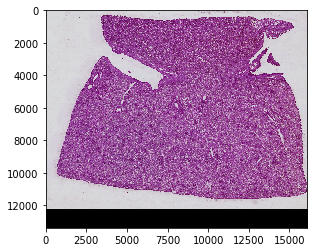

In [11]:
plt.imshow(my_img)

In [12]:
for i in list_of_coordinates_Jash:
    pts_Jash = np.array(i, np.int32)
    pts_Jash = pts_Jash.reshape((-1,1,2))
    cv2.polylines(my_img,[pts_Jash],True,(255,0,0),5)

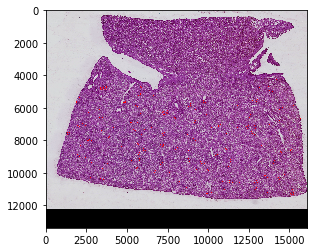

In [13]:
plt.imshow(my_img)

In [15]:
cv2.imwrite('Jashjeet.jpg',my_img)

True

In [16]:
my_img_Leah = cv2.imread('VAN0008j.jpg')

In [17]:
for i in list_of_coordinates_Leah:
    pts_Leah = np.array(i, np.int32)
    pts_Leah = pts_Leah.reshape((-1,1,2))
    cv2.polylines(my_img,[pts_Leah],True,(0,43,255),5)
    cv2.polylines(my_img_Leah,[pts_Leah],True,(0,43,255),5)

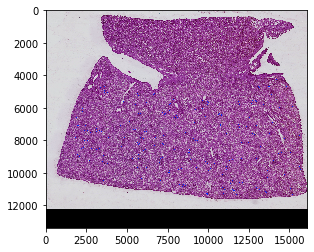

In [18]:
plt.imshow(my_img_Leah)

In [19]:
cv2.imwrite('Leah.jpg',my_img_Leah)

True

In [20]:
cv2.imwrite('ff.jpg',my_img)

True

In [26]:
from read_roi import read_roi_file
from read_roi import read_roi_zip
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageDraw

In [27]:
# to handle decompression bomb
Image.MAX_IMAGE_PIXELS = None

In [28]:
#reading roi files

rois_Sumeet = read_roi_zip("VAN0008Sumeet.zip")

rois_Yash = read_roi_zip("VAN0008Yash.zip")

In [29]:
im_pil = Image.fromarray(my_img)
draw = ImageDraw.Draw(im_pil)

In [30]:
im_Sumeet = Image.open("VAN0008j.jpg")
draw_Sumeet=ImageDraw.Draw(im_Sumeet)

im_Yash = Image.open("VAN0008j.jpg")
draw_Yash=ImageDraw.Draw(im_Yash)

In [31]:
for key in rois_Sumeet.keys():
    left = rois_Sumeet[key]['left']
    top = rois_Sumeet[key]['top']
    width = rois_Sumeet[key]['width']
    height = rois_Sumeet[key]['height']
    
    centreX = int(left + (width/2))
    centreY = int(top + (height/2))
    widthX = int(width/2)
    heightY = int(height/2) 
    
    bbox = (centreX-widthX,centreY-heightY,centreX+widthX,centreY+heightY)
    draw.ellipse(bbox, outline = "pink", width = 20)
    draw_Sumeet.ellipse(bbox, outline = "pink", width = 20)    

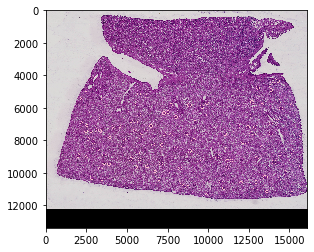

In [32]:
plt.imshow(im_Sumeet)

In [33]:
im_Sumeet.save("Sumeet.jpg")

In [34]:
draw = ImageDraw.Draw(im_pil)

In [35]:
for key in rois_Yash.keys():
    left = rois_Yash[key]['left']
    top = rois_Yash[key]['top']
    width = rois_Yash[key]['width']
    height = rois_Yash[key]['height']
    
    centreX = int(left + (width/2))
    centreY = int(top + (height/2))
    widthX = int(width/2)
    heightY = int(height/2) 
    
    bbox = (centreX-widthX,centreY-heightY,centreX+widthX,centreY+heightY)
    draw.ellipse(bbox, outline = "green", width = 5)
    draw_Yash.ellipse(bbox, outline = "green", width = 5)

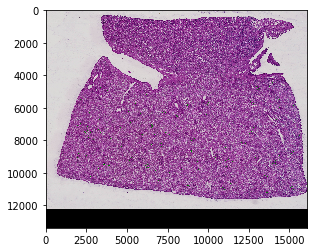

In [36]:
plt.imshow(im_Yash)

In [37]:
im_Yash.save("Yash.jpg")

In [38]:
im_pil.save("VAN0008_output.jpg")